In [1]:
from ase.io import read, write

import numpy as np
import matplotlib.pyplot as plt

### Kinetic cutoff energies convergence

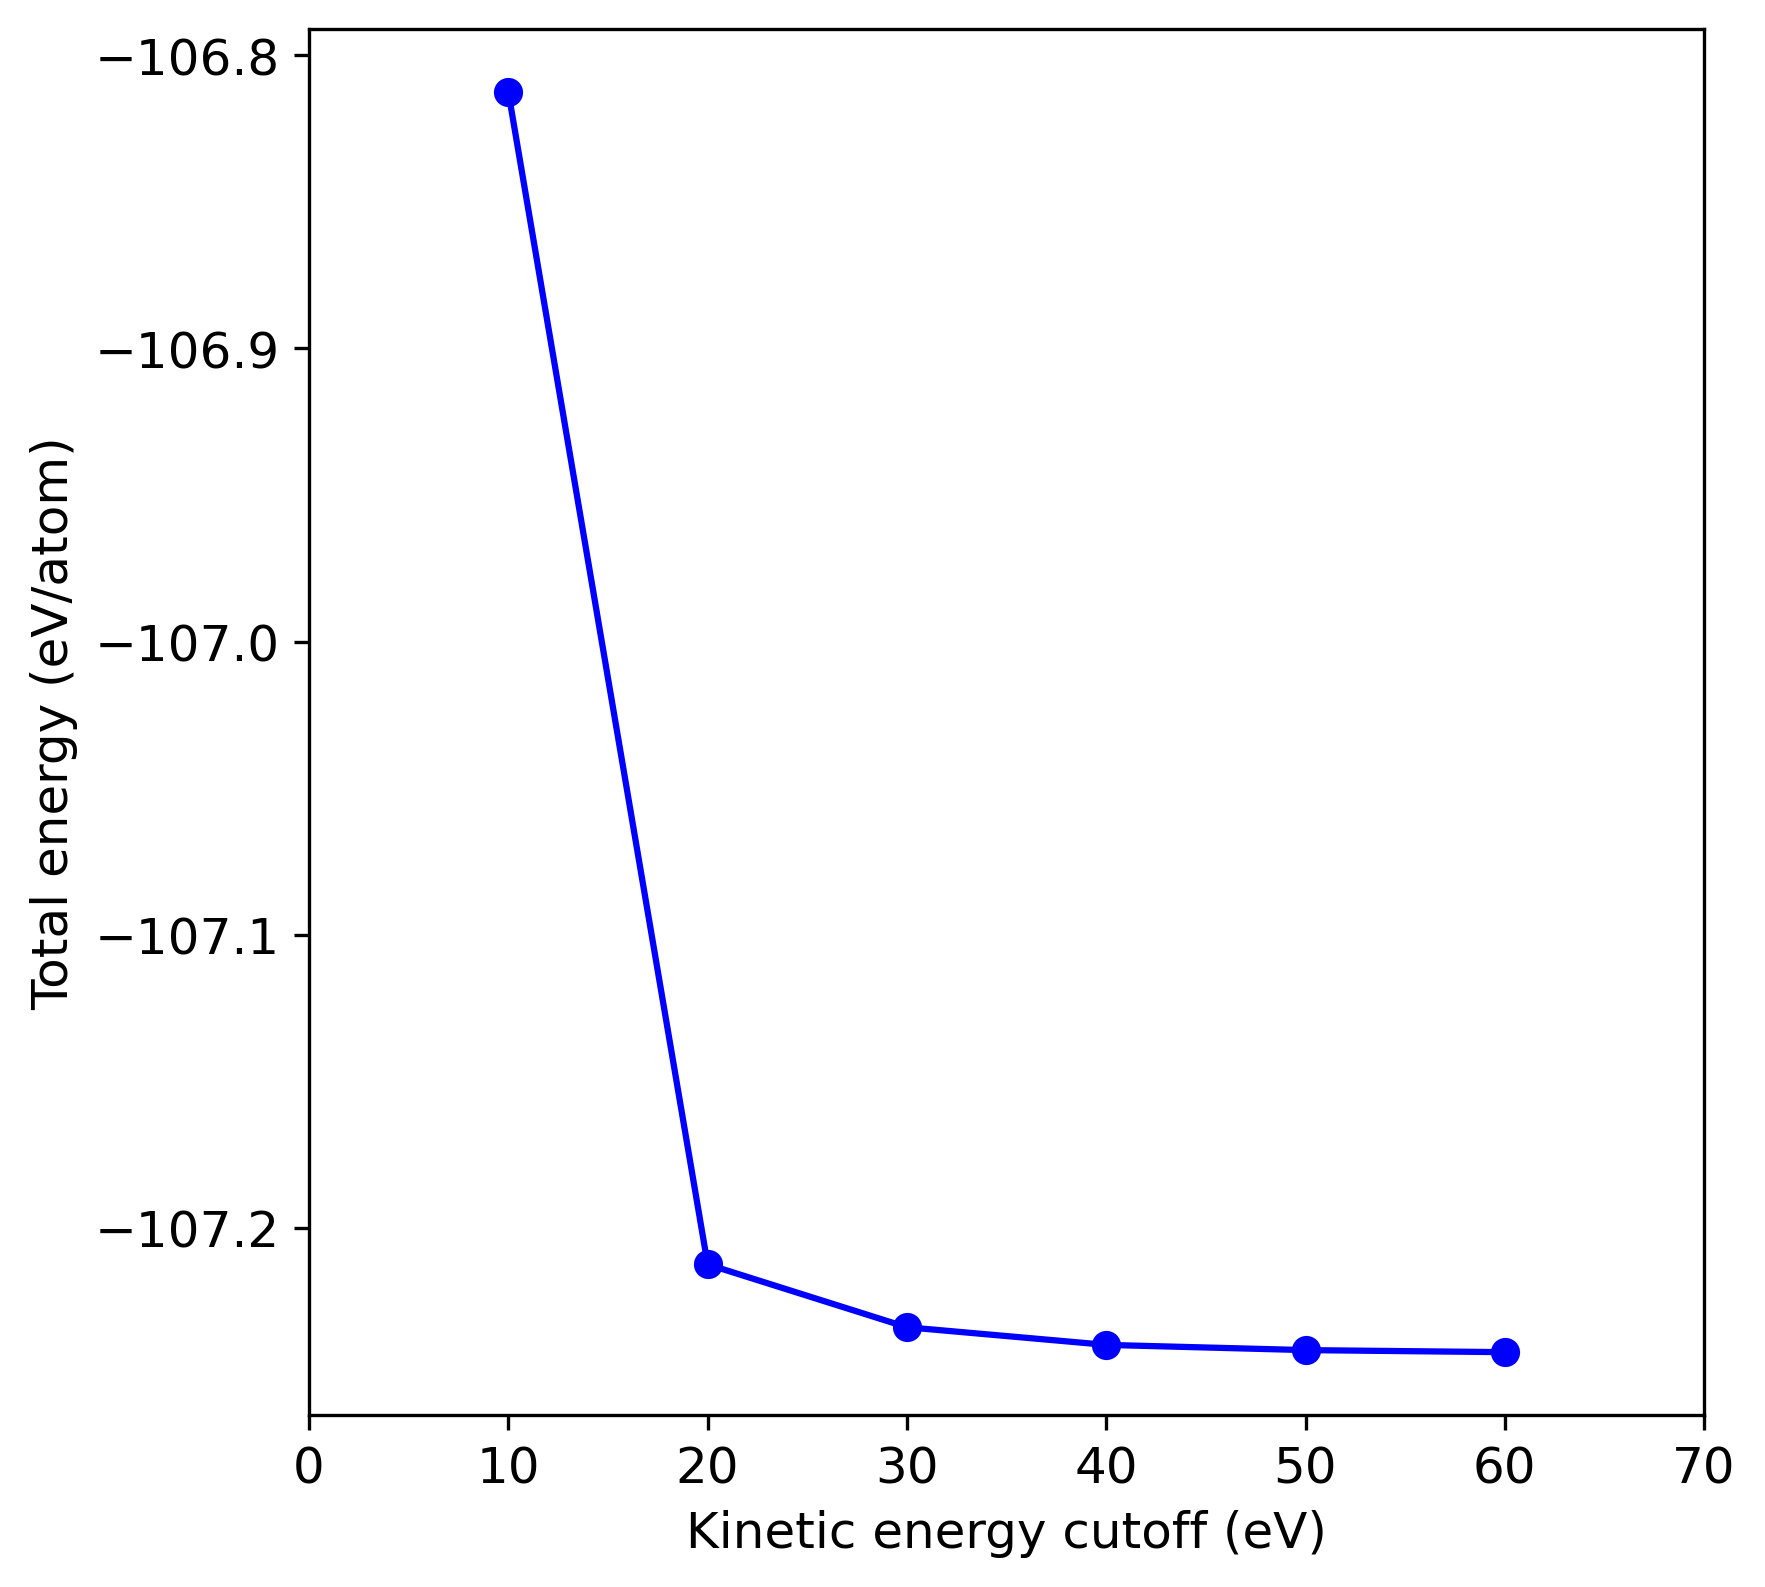

In [19]:
# Specify the range of cutoff energies
wfcs = range(10, 70, 10)

# Initialize an empty list to store energies
energy_list = []

# Loop over the cutoff energies
for wfc in wfcs:
    # Read the output file for each cutoff energy
    bulk_si_out = read('ecut/pw-si-' + str(wfc) + '.out', format='espresso-out')

    # Get the potential energy from the output
    energy = bulk_si_out.get_potential_energy()

    # Append the energy to the list
    energy_list.append(energy)

# Convert the energy list to a NumPy array and normalize by the number of atoms
energies = np.array(energy_list) / len(bulk_si_out)

# Plotting
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6, 6), dpi=300)
axes = fig.add_subplot(1, 1, 1)

axes.set_xlabel('Kinetic energy cutoff (eV)')
axes.set_ylabel('Total energy (eV/atom)')

# Plot the energy versus cutoff energies
axes.plot(wfcs, energies, ls ='-', marker='o', color='b')

# 
axes.set_xlim(0, 70)

# Save the plot to a file
fig.savefig('ecut.png', bbox_inches='tight')

# Display the plot
plt.show(fig)

### k-point grid convergence

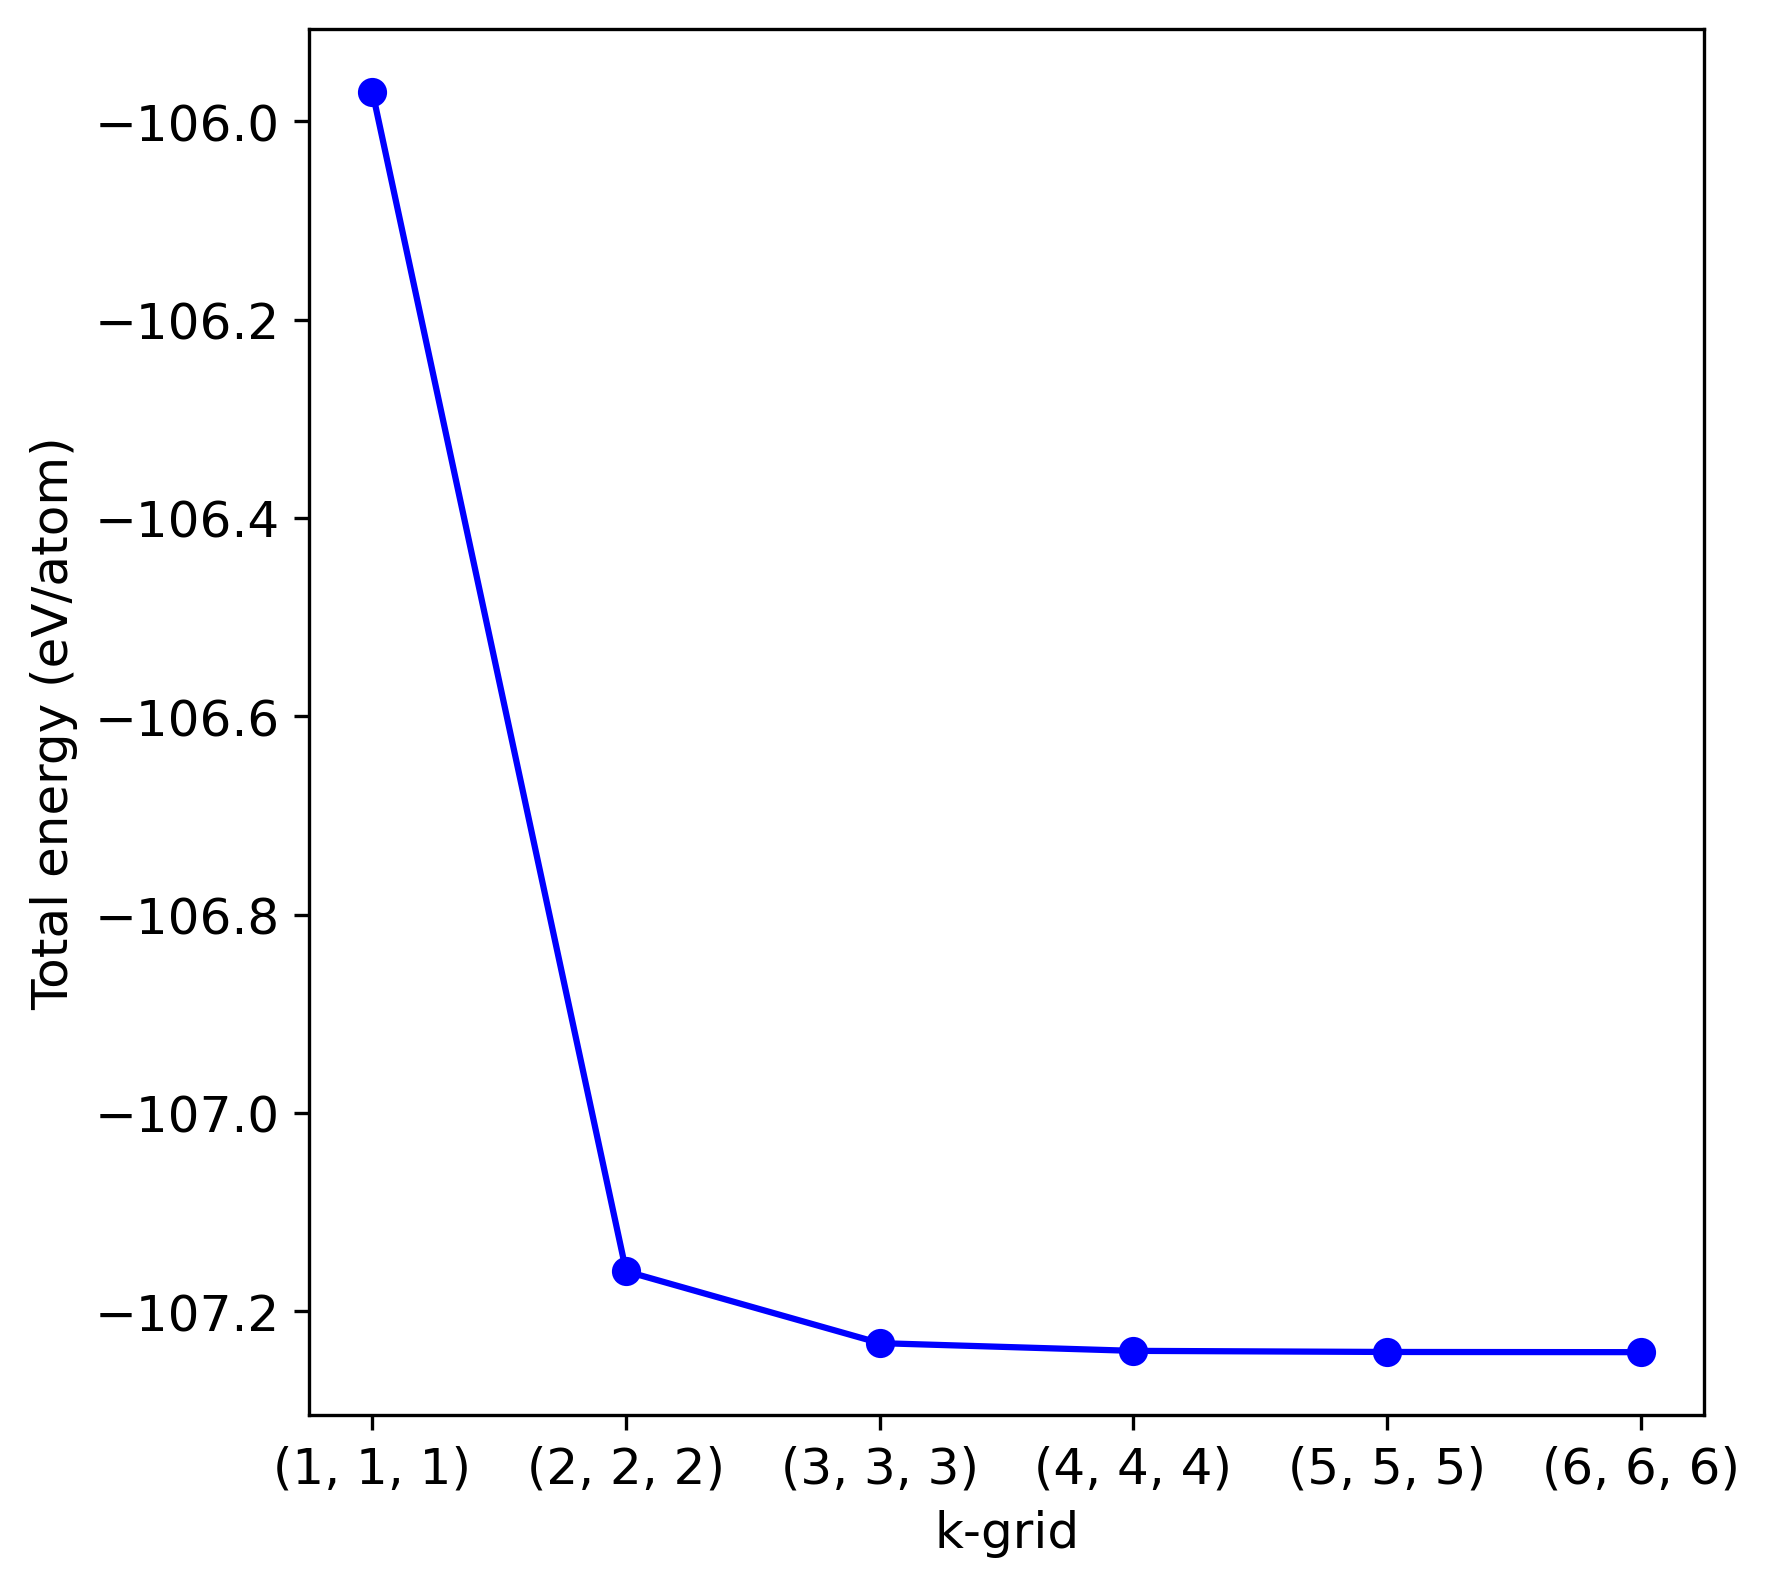

In [44]:
# Specify the range of cutoff energies
kpoints_list = []
n = 1  # Start with n = 1

while True:
    kpoints_list.append((n, n, n))
    n += 1
    if n == 7:  # Adjust the limit as needed
        break

# Initialize an empty list to store energies
energy_list = []

# Loop over the cutoff energies
for kpoints in kpoints_list:

    # Read the output file for each cutoff energy
    kpoints_string = ''.join(str(x) for x in kpoints)    
    bulk_si_out = read('kpoints/pw-si-' + kpoints_string + '.out', format='espresso-out')

    # Get the potential energy from the output
    energy = bulk_si_out.get_potential_energy()

    # Append the energy to the list
    energy_list.append(energy)

# Convert the energy list to a NumPy array and normalize by the number of atoms
energies = np.array(energy_list) / len(bulk_si_out)

# Plotting
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6, 6), dpi=300)
axes = fig.add_subplot(1, 1, 1)

axes.set_xlabel('k-grid')
axes.set_ylabel('Total energy (eV/atom)')

axes.set_xticks([x for x in range(0,6)])
axes.set_xticklabels(kpoints_list)

# Plot the energy versus cutoff energies
axes.plot(range(len(energies)), energies, ls ='-', marker='o', color='b')

# 
#axes.set_xlim(0, 70)

# Save the plot to a file
fig.savefig('kpoint.png', bbox_inches='tight')

# Display the plot
plt.show(fig)